# Deal with Outliers by eliminiating them if possible(Consider Correlations before)

# Fix Missing Values either by dropping based on rows or columns
## For features with only a few points missing we can consider dropping the rows altogether or replacing them with something meaningful based on domain knowledge. Lets say if percentage missing is Less than 1 %(Depends on Context)


# Use One Hot Encoding Option

# Import Dependencies

In [1]:
%run ./dtale_dataprep_helper.ipynb

# Read Data & Define Target Feature

In [2]:
data_df = pd.read_csv(".\DATA\Ames_Housing_Data.csv")

In [3]:
target_col = "SalePrice"

In [4]:
data_df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


# Use DTale For Analysis

In [5]:
dtale.show(data_df)

# Describe and Info the dataframe.Show Correlations.Drop Outliers i.e. rows where target column is outlier relative to features with which it has most correlation

## Info Describe and Correlation

In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [7]:
data_df.describe()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [8]:
data_df.corr()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
PID,1.000000,-0.001281,-0.096918,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.229283,-0.098375,...,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
MS SubClass,-0.001281,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,-0.060075,...,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot Frontage,-0.096918,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,0.215583,...,0.120084,0.163040,0.012758,0.028564,0.076666,0.173947,0.044476,0.011085,-0.007547,0.357318
Lot Area,0.034868,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,0.191555,...,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
Overall Qual,-0.263147,0.039419,0.212042,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,0.284118,...,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
Overall Cond,0.104451,-0.067349,-0.074448,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135340,-0.050935,...,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
Year Built,-0.343388,0.036579,0.121562,0.023258,0.597027,-0.368773,1.000000,0.612095,0.313292,0.279870,...,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
Year Remod/Add,-0.157111,0.043397,0.091712,0.021682,0.569609,0.047680,0.612095,1.000000,0.196928,0.151790,...,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
Mas Vnr Area,-0.229283,0.002730,0.222407,0.126830,0.429418,-0.135340,0.313292,0.196928,1.000000,0.301872,...,0.165467,0.143748,-0.110787,0.013778,0.065643,0.004617,0.044934,-0.000276,-0.017715,0.508285
BsmtFin SF 1,-0.098375,-0.060075,0.215583,0.191555,0.284118,-0.050935,0.279870,0.151790,0.301872,1.000000,...,0.224010,0.124947,-0.100455,0.050541,0.095874,0.084140,0.092886,-0.001155,0.022397,0.432914


<AxesSubplot:>

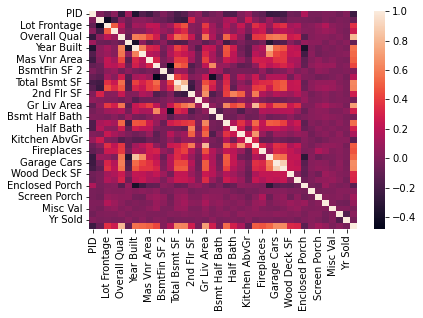

In [9]:
sns.heatmap(data_df.corr())

## DIstribution for Target Column

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

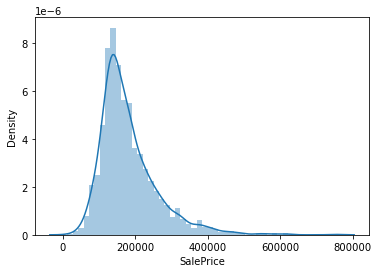

In [10]:
sns.distplot(data_df[target_col])

## Show Scatter Plots w.r.t most correlated features & Outlier Rows of Target columns based on them

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

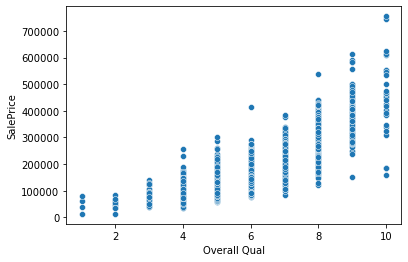

In [11]:
sns.scatterplot(x='Overall Qual',y=target_col,data=data_df)

In [12]:
data_df[(data_df['Overall Qual']>8) & (data_df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

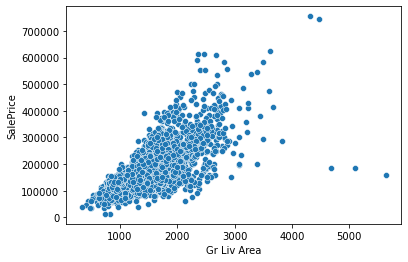

In [13]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data=data_df)

In [14]:
data_df[(data_df['Gr Liv Area']>4000) & (data_df['SalePrice']<400000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


## Drop the outliers

In [15]:
ind_drop = data_df[(data_df['Gr Liv Area']>4000) & (data_df['SalePrice']<400000)].index
ind_drop

Int64Index([1498, 2180, 2181], dtype='int64')

In [16]:
data_df = data_df.drop(ind_drop,axis=0)

# Show Boxplots(Pending)

In [17]:
# numeric_cols = [curr_col  for curr_col in list(data_df.columns) if data_df[curr_col].dtype == "int64"  or data_df[curr_col].dtype == "float64"]
# numeric_cols

In [18]:
"""
#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(45,1,figsize=(200,550))

for index,curr_col in enumerate(numeric_cols,):
    if data_df[curr_col].dtype == "int64"  or data_df[curr_col].dtype == "float64" :
        sns.boxplot(data=data_df[curr_col],ax=axes[index])
    axes[index].title.set_text(f"{curr_col}")

plt.show()
"""

'\n#define plotting region (2 rows, 2 columns)\nfig, axes = plt.subplots(45,1,figsize=(200,550))\n\nfor index,curr_col in enumerate(numeric_cols,):\n    if data_df[curr_col].dtype == "int64"  or data_df[curr_col].dtype == "float64" :\n        sns.boxplot(data=data_df[curr_col],ax=axes[index])\n    axes[index].title.set_text(f"{curr_col}")\n\nplt.show()\n'

# Missing feature fix 

## Check Percentage Missing for each feature

In [19]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [20]:
percent_nan = percent_missing(data_df)

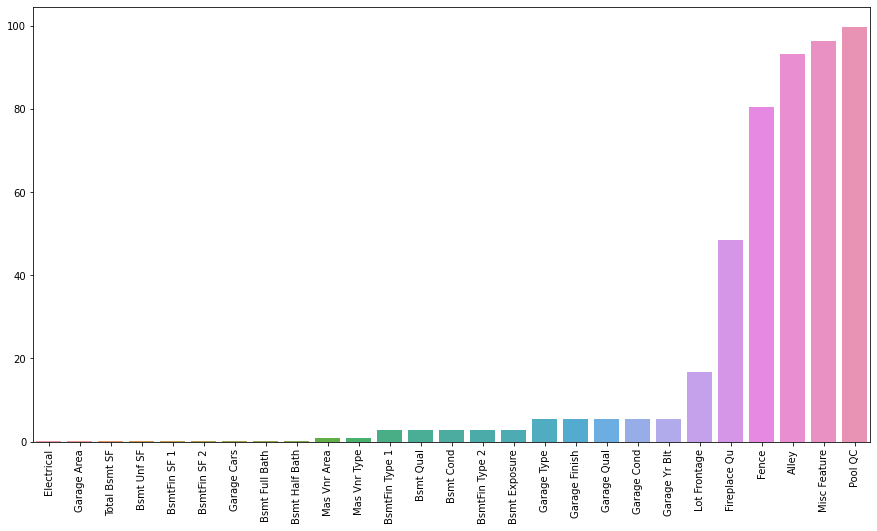

In [21]:
plt.figure(figsize=(15,8))
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

## Show Features & their counts missing less than 1 percent of data

In [22]:
# In Percentage
percent_nan[percent_nan<1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

In [23]:
# In Counts
len(data_df) * percent_nan[percent_nan<1] / 100 

Electrical         1.0
Garage Area        1.0
Total Bsmt SF      1.0
Bsmt Unf SF        1.0
BsmtFin SF 1       1.0
BsmtFin SF 2       1.0
Garage Cars        1.0
Bsmt Full Bath     2.0
Bsmt Half Bath     2.0
Mas Vnr Area      23.0
Mas Vnr Type      23.0
dtype: float64

## Fix Data based on Rows

In [24]:
"""
Drop the rows where we are missing the data for features with less than 1 percent or small amount of data
"""

'\nDrop the rows where we are missing the data for features with less than 1 percent or small amount of data\n'

### Drop the rows which account for a column missing a very small percent of data out of total

In [25]:
data_df = data_df.dropna(axis=0,subset= ['Electrical','Garage Cars'])

### Check Count and Percentage of missing features again

In [26]:
percent_nan = percent_missing(data_df)

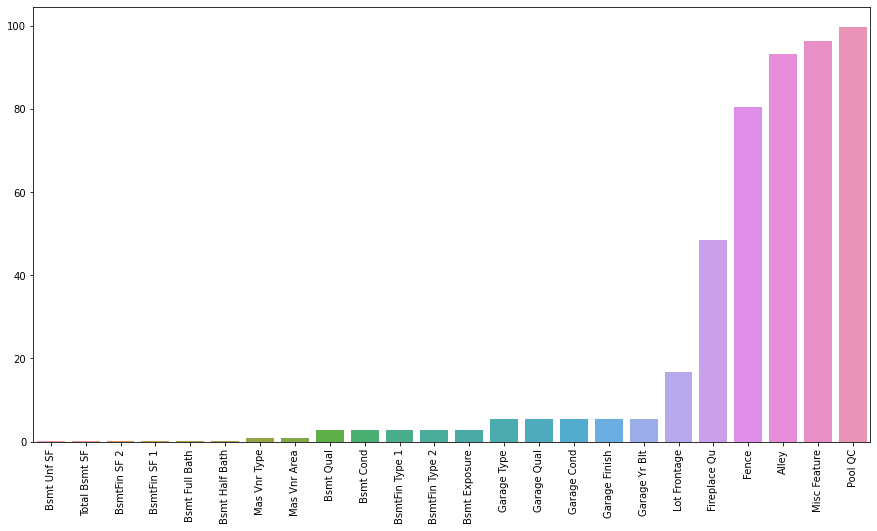

In [27]:
plt.figure(figsize=(15,8))
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [28]:
# In Percentage
percent_nan[percent_nan<1]

Bsmt Unf SF       0.034188
Total Bsmt SF     0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Type      0.786325
Mas Vnr Area      0.786325
dtype: float64

In [29]:
# In Counts
len(data_df) * percent_nan[percent_nan<1] / 100 

Bsmt Unf SF        1.0
Total Bsmt SF      1.0
BsmtFin SF 2       1.0
BsmtFin SF 1       1.0
Bsmt Full Bath     2.0
Bsmt Half Bath     2.0
Mas Vnr Type      23.0
Mas Vnr Area      23.0
dtype: float64

### Replace Column Values with 0 or null where appropriate

In [30]:
# Numerical Basement Columns
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
data_df[bsmt_num_cols] = data_df[bsmt_num_cols].fillna(0)

In [31]:
# String Basement Columns
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
data_df[bsmt_str_cols] = data_df[bsmt_str_cols].fillna('None')

In [32]:
data_df["Mas Vnr Type"] = data_df["Mas Vnr Type"].fillna("None")
data_df["Mas Vnr Area"] = data_df["Mas Vnr Area"].fillna(0)

## Fixing Data based on Columns

In [33]:
"""
IF feature misses lot of values say 80% or more or 90% or more makes sense ti drop it.
But if it becames important in future for prediction, you can't consider it because your model cant consider feauture.
If you want to do the same you will need to fill in historical values and retrain the model.

For small percentage of missing feautures we can fill in values but that means we are changing ground truth.
This requires domain knowledge and you must apply this transformation to all future data for prediction.
i>For simple case You need to see where you can fill feautures with reasonable assumption ex:no of children to 0 for missing val
ii>For harder cases we need statistical analysis based on other columns to fill missing or na values
Example lets say we are missing some age data for couple of rows.
However we can take average age of present data based on career status/education and use that to fill in missing values
"""

"\nIF feature misses lot of values say 80% or more or 90% or more makes sense ti drop it.\nBut if it becames important in future for prediction, you can't consider it because your model cant consider feauture.\nIf you want to do the same you will need to fill in historical values and retrain the model.\n\nFor small percentage of missing feautures we can fill in values but that means we are changing ground truth.\nThis requires domain knowledge and you must apply this transformation to all future data for prediction.\ni>For simple case You need to see where you can fill feautures with reasonable assumption ex:no of children to 0 for missing val\nii>For harder cases we need statistical analysis based on other columns to fill missing or na values\nExample lets say we are missing some age data for couple of rows.\nHowever we can take average age of present data based on career status/education and use that to fill in missing values\n"

### Check Count and Percentage of missing features again

In [34]:
percent_nan = percent_missing(data_df)

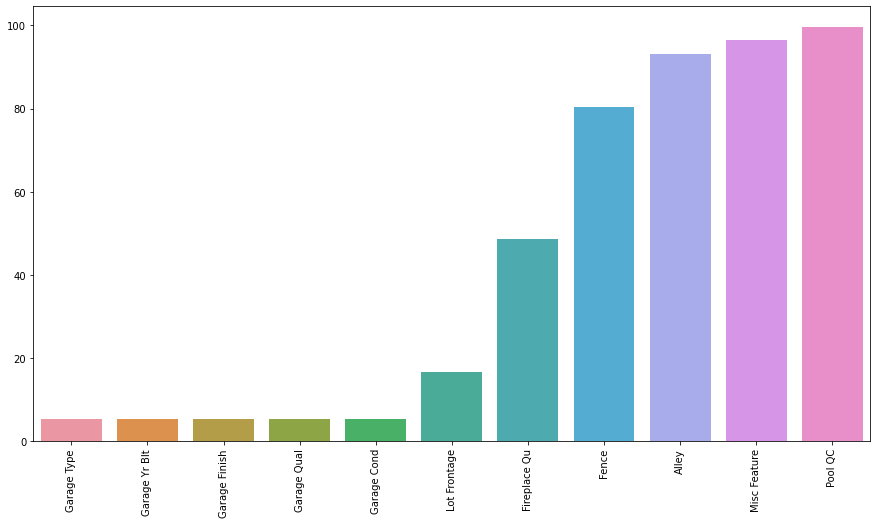

In [35]:
plt.figure(figsize=(15,8))
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

### Fill the Missing Garage String Columns with None and Number Columns with 0

In [36]:
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
data_df[gar_str_cols] = data_df[gar_str_cols].fillna('None')

In [37]:
data_df['Garage Yr Blt'] = data_df['Garage Yr Blt'].fillna(0)

### Drop features with large missing percetage

In [38]:
data_df = data_df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)

### Fill missing value with None STring Value with medium size missing value especially if it has fewer distinct values

In [39]:
data_df['Fireplace Qu'] = data_df['Fireplace Qu'].fillna("None")

### Fill missing value for numerical column using statsistical analysis esppecially it has a large no. of unique values

<AxesSubplot:xlabel='Lot Frontage', ylabel='Neighborhood'>

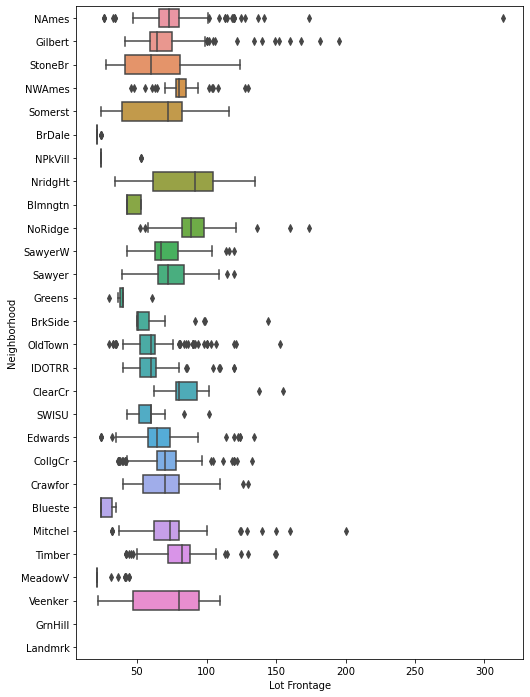

In [40]:
# Plot distribtion of Lot Frontage based on neighborhood
plt.figure(figsize=(8,12))
sns.boxplot(x='Lot Frontage',y='Neighborhood',data=data_df,orient='h')

In [41]:
# Get Mean Lot Frontage per neighborhood
data_df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

In [42]:
# Use Transform function to replace empty values in Lot Frontage based on mean wrt Neighborhood
data_df['Lot Frontage'] = data_df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

In [43]:
# Fill remaining empty values for Lot Frontage
data_df['Lot Frontage'] = data_df['Lot Frontage'].fillna(0)

### Check new number of missing columns

In [44]:
percent_nan = percent_missing(data_df)
percent_nan

Series([], dtype: float64)

## Deal with categorical columns by creating dummy variables

### Convert Subclass to a string column so that Pandas Identifies it as an Object instead of number

In [45]:
# Convert to String
data_df['MS SubClass'] = data_df['MS SubClass'].apply(str)

### Extract Number and Object features separately

In [46]:
df_nums = data_df.select_dtypes(exclude='object')
df_objs = data_df.select_dtypes(include='object')

In [47]:
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2925 non-null   int64  
 1   Lot Frontage     2925 non-null   float64
 2   Lot Area         2925 non-null   int64  
 3   Overall Qual     2925 non-null   int64  
 4   Overall Cond     2925 non-null   int64  
 5   Year Built       2925 non-null   int64  
 6   Year Remod/Add   2925 non-null   int64  
 7   Mas Vnr Area     2925 non-null   float64
 8   BsmtFin SF 1     2925 non-null   float64
 9   BsmtFin SF 2     2925 non-null   float64
 10  Bsmt Unf SF      2925 non-null   float64
 11  Total Bsmt SF    2925 non-null   float64
 12  1st Flr SF       2925 non-null   int64  
 13  2nd Flr SF       2925 non-null   int64  
 14  Low Qual Fin SF  2925 non-null   int64  
 15  Gr Liv Area      2925 non-null   int64  
 16  Bsmt Full Bath   2925 non-null   float64
 17  Bsmt Half Bath

In [48]:
df_objs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MS SubClass     2925 non-null   object
 1   MS Zoning       2925 non-null   object
 2   Street          2925 non-null   object
 3   Lot Shape       2925 non-null   object
 4   Land Contour    2925 non-null   object
 5   Utilities       2925 non-null   object
 6   Lot Config      2925 non-null   object
 7   Land Slope      2925 non-null   object
 8   Neighborhood    2925 non-null   object
 9   Condition 1     2925 non-null   object
 10  Condition 2     2925 non-null   object
 11  Bldg Type       2925 non-null   object
 12  House Style     2925 non-null   object
 13  Roof Style      2925 non-null   object
 14  Roof Matl       2925 non-null   object
 15  Exterior 1st    2925 non-null   object
 16  Exterior 2nd    2925 non-null   object
 17  Mas Vnr Type    2925 non-null   object
 18  Exter Qu

### Convert to Dummy Variables and Combine back with numeric columns

In [49]:
df_objs = pd.get_dummies(df_objs,drop_first=True)

In [50]:
final_df = pd.concat([df_nums,df_objs],axis=1)

In [51]:
final_df

,PID,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,526301100,141.000000,31770,6,5,1960,1960,112.0,639.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,526350040,80.000000,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,0,1,0,0,0,1,0
2,526351010,81.000000,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,526353030,93.000000,11160,7,5,1968,1968,0.0,1065.0,0.0,...,0,0,0,0,1,0,0,0,1,0
4,527105010,74.000000,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,37.000000,7937,6,6,1984,1984,0.0,819.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2926,923276100,75.144444,8885,5,5,1983,1983,0.0,301.0,324.0,...,0,0,0,0,1,0,0,0,1,0
2927,923400125,62.000000,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2928,924100070,77.000000,10010,5,5,1974,1975,0.0,1071.0,123.0,...,0,0,0,0,1,0,0,0,1,0


## See the correlation of the target column 

In [52]:
final_df.corr()['SalePrice'].sort_values()

Exter Qual_TA       -0.591459
Kitchen Qual_TA     -0.527461
Fireplace Qu_None   -0.481740
Bsmt Qual_TA        -0.453022
Garage Finish_Unf   -0.422363
                       ...   
Garage Cars          0.648488
Total Bsmt SF        0.660983
Gr Liv Area          0.727279
Overall Qual         0.802637
SalePrice            1.000000
Name: SalePrice, Length: 275, dtype: float64

Executing shutdown due to inactivity...


2022-03-04 21:07:00,198 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2022-03-04 21:07:12,485 - INFO     - Executing shutdown...
